In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from matplotlib import pyplot as plt
from pprint import pprint
from matplotlib import style
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import seaborn as sns
import sys
import math 
import random as rd
from sklearn.model_selection import KFold
import statistics

In [2]:
data=pd.read_csv('data_reduced.csv')
pd.set_option('max_rows', 400)
pd.set_option('max_columns', 400)

In [3]:
featurename=['imr_mean_mean','mean_coastal_km', 'peaceyears', 'ldiscrimpop', 'gdp95_corr',
         'geo_typeid', 'landarea_sum','ed_rel1_size','meanelev']

positionnan=[];
#data.reset_index();
count=data['imr_mean_mean'];
for i in range(1,len(featurename)):
    count=count*data[featurename[i]];
for i in data.index:
      if np.isnan(count[i]) or data["year"][i]!=2000:
        positionnan.append(i);
data=data.drop(data.index[positionnan])

In [4]:
num_features=len(featurename)
X=data[featurename[1:num_features]];
y=data[featurename[0]];
X=X.fillna(0)

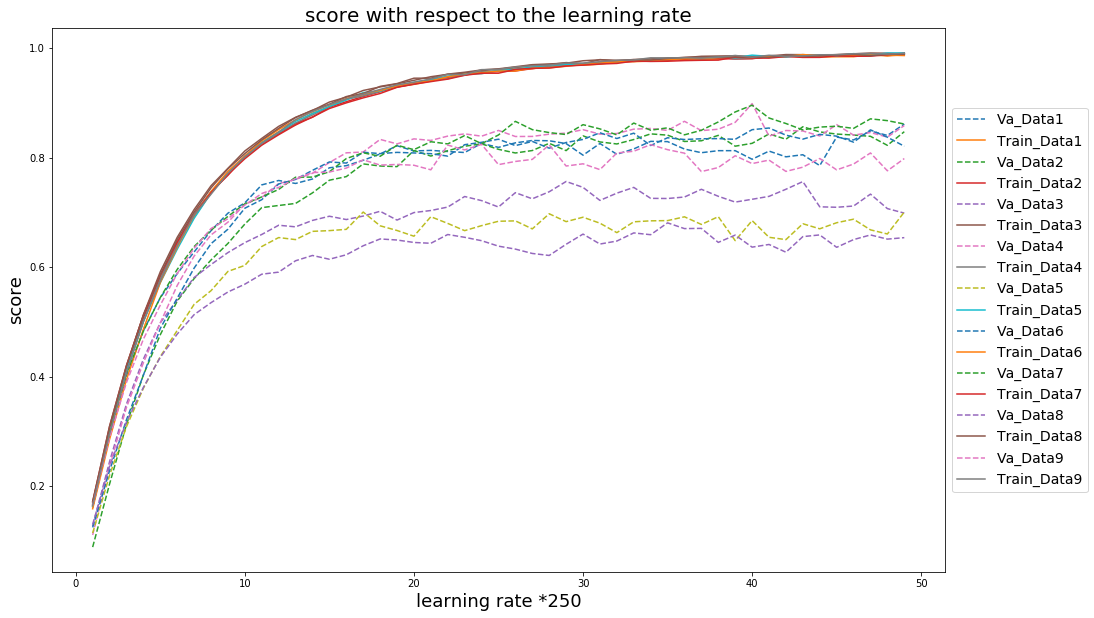

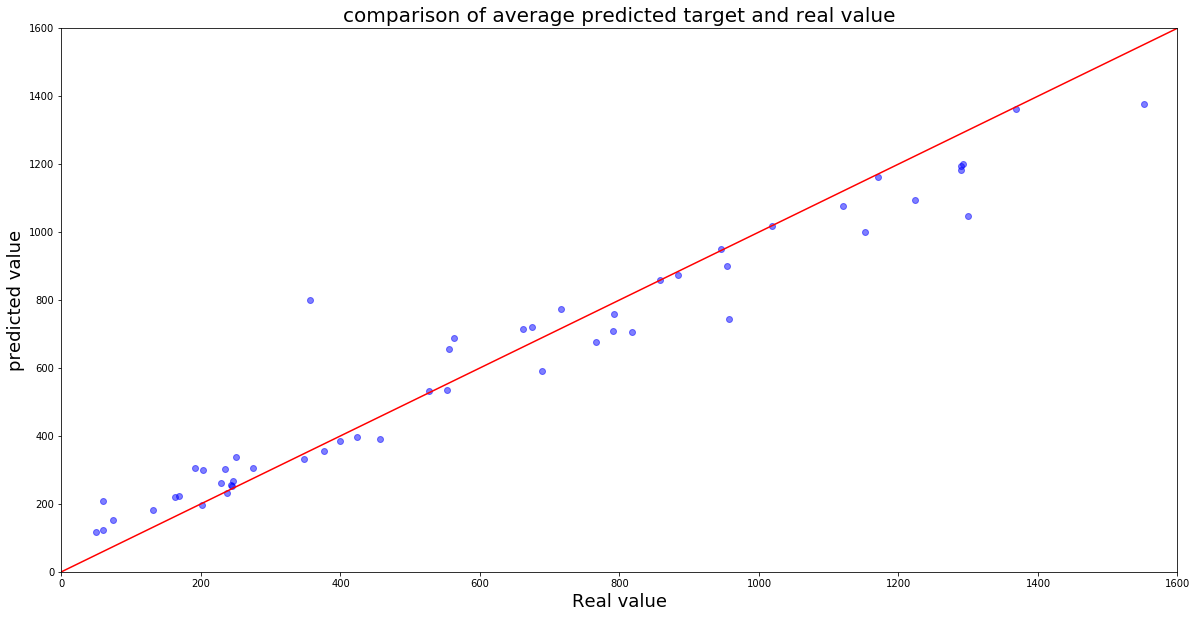

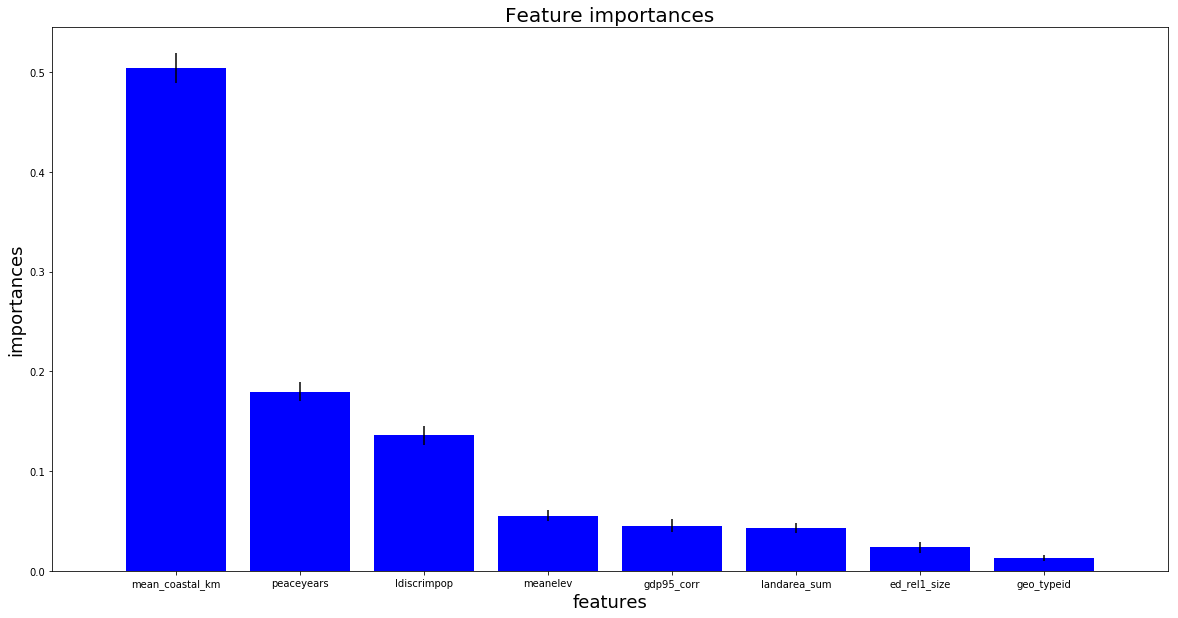

average score on test= 0.9296457414301956 std= 0.009829741336135633


In [25]:
fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(111) 
score_test = []
num_rows=X.shape[0];
num_trainrows=int(num_rows*0.8);
num_varows=int(num_rows*0.9);
num_fold=9;
kf = KFold(n_splits=num_fold,shuffle=True)
j=1;
X.reset_index()
y.reset_index()
indexlist=list(X.index);
for i in range(500):
    rd.shuffle(indexlist);
sampling=indexlist[0:num_varows];
testing=indexlist[num_varows:-1];
X_test=X.loc[testing,:];
y_test=y.loc[testing];
scoretest=[];
testpredict=[];
importance=[];
importanceaver=[];
importancestd=[];
models=[];
for train_index, va_index in kf.split(sampling):
    score_train = [];
    score_va = [];
    X_train = X.iloc[train_index,:];
    X_va = X.iloc[va_index,:];
    y_train=y.iloc[train_index];
    y_va = y.iloc[va_index];
    for i in range(1,50):
    #Paramterize the model and let i be the number of minimum instances per leaf node
        regression_model=GradientBoostingRegressor(learning_rate=0.004*i, n_estimators=30, min_samples_split=30, max_depth=10)
        regression_model.fit(X_train.iloc[:,:],y_train.iloc[:]);
    #Predict query instances
        predicted_train = regression_model.predict(X_train.iloc[:,:]);
        predicted_va = regression_model.predict(X_va.iloc[:,:]);
    #Calculate and append the scores
        score_train.append(regression_model.score(X_train.iloc[:,:],y_train.iloc[:]));
        score_va.append(regression_model.score(X_va.iloc[:,:],y_va.iloc[:]));
        if  i==20:
            importance.append(list(regression_model.feature_importances_));    
            scoretest.append(regression_model.score(X_test.iloc[:,:],y_test.iloc[:]));
            testpredict.append(list(regression_model.predict(X_test.iloc[:,:])));
            models.append(regression_model);                  
                               
    ax0.plot(range(1,50),score_va,'--',label='Va_Data'+str(j));
    ax0.plot(range(1,50),score_train,label='Train_Data'+str(j));
    j=j+1;
# Shrink current axis by 20%
testpredictaver=[];
for i in range(X_test.shape[0]):
    sum1=0;
    count=0;
    for j in range(len(testpredict)):
        count=count+1;
        sum1=sum1+testpredict[j][i];
    testpredictaver.append(sum1/count);
    
for i in range(len(importance[0])):
    sum1=0;
    sum1square=0;
    count=0;
    for j in range(len(testpredict)):
        count=count+1;
        sum1=sum1+importance[j][i];
        sum1square=sum1square+importance[j][i]**2;
    importanceaver.append(sum1/count);
    importancestd.append(sqrt(sum1square/count-(sum1/count)**2))
indices = np.argsort(importanceaver)[::-1]
box = ax0.get_position()
ax0.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 14})
ax0.set_title('score with respect to the learning rate',size=20)
ax0.set_xlabel('learning rate *250',fontsize=18)
ax0.set_ylabel('score',fontsize=18)

fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(y_test.iloc[:], testpredictaver, c="blue", alpha=0.5)
ax1.set_title('comparison of average predicted target and real value',size=20)
ax1.set_xlabel('Real value',fontsize=18)
ax1.set_ylabel('predicted value',fontsize=18)
ax1.set_xlim((0,1600))
ax1.set_ylim((0,1600))
ax1.plot(np.linspace(0,1600,num=10),np.linspace(0,1600,num=10),color='r')

fig2=plt.figure(figsize=(20,10))
ax2 = fig2.add_subplot(111) 
ax2.set_title("Feature importances",size=20)
ax2.bar(range(X.shape[1]), np.array(importanceaver)[indices],
       color="b", yerr=np.array(importancestd)[indices], align="center")
ax2.set_xticks(np.arange(X.shape[1]))
ax2.set_xticklabels((X.columns.values[indices]))
ax2.set_xlabel('features',fontsize=18)
ax2.set_ylabel('importances',fontsize=18)
ax2.set_xlim([-1, X.shape[1]])
plt.show()
print('average score on test=',statistics.mean(scoretest),'std=',statistics.stdev(scoretest))

In [38]:
X_experiment = pd.DataFrame(data=None,columns=X.columns)
means=[];
min_coastal=min(X.iloc[:,0]);
max_coastal=max(X.iloc[:,0]);
grid=(max_coastal-min_coastal)/200
for i in range(1,8):
    means.append(np.mean(X.iloc[:,i]));
for i in range(200):
    X_experiment.loc[str(i)] = [i*grid+min_coastal,means[0],means[1],means[2],means[3],means[4],means[5],means[6]]

In [39]:
X.shape

(529, 8)

In [40]:
y_experiment=[];
for i in range(9):
    y_experiment.append((models[i]).predict(X_experiment.iloc[:,:]))

In [41]:
y_experiment_aver=[];
for i in range(X_experiment.shape[0]):
    sum1=0;
    count=0;
    for j in range(len(y_experiment)):
        count=count+1;
        sum1=sum1+y_experiment[j][i];
    y_experiment_aver.append(sum1/count);

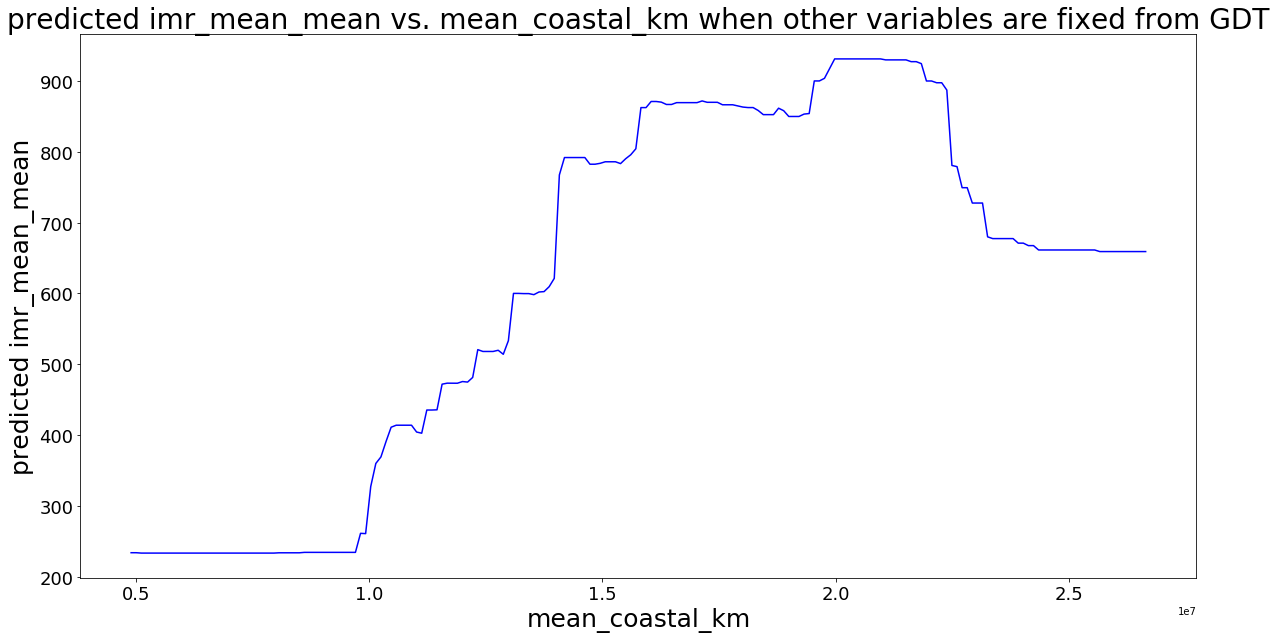

In [43]:
fig3 = plt.figure(figsize=(20,10))
ax3 = fig3.add_subplot(111) 
ax3.set_title('predicted imr_mean_mean vs. mean_coastal_km when other variables are fixed from GDT',size=28)
ax3.tick_params(labelsize=18)
ax3.set_xlabel('mean_coastal_km',fontsize=25)
ax3.set_ylabel('predicted imr_mean_mean',fontsize=25)
ax3.plot(X_experiment.iloc[:,0],y_experiment_aver,color='blue')

In [44]:
fig3.savefig('imr-costal_aver.eps', format='eps', dpi=1000)

In [47]:
maximum=[];
minimum=[];
min_coastal=min(X.iloc[:,0]);
max_coastal=max(X.iloc[:,0]);
grid=(max_coastal-min_coastal)/200;
y_experiment_integral=[];
y_experiment_std=[];
for i in range(1,8):
    maximum.append(max(X.iloc[:,i]));
    minimum.append(min(X.iloc[:,i]));
for i in range(200):
    X_experiment = pd.DataFrame(data=None,columns=X.columns);
    y_experiment = [];
    for j in range(1000):
        X_experiment.loc[str(j)] = [i*grid+min_coastal,minimum[0]+rd.random()*(maximum[0]-minimum[0]),\
                                    minimum[1]+rd.random()*(maximum[1]-minimum[1]),minimum[2]+rd.random()*(maximum[2]-minimum[2]),\
                                    minimum[3]+rd.random()*(maximum[3]-minimum[3]),minimum[4]+rd.random()*(maximum[4]-minimum[4]),\
                                    minimum[5]+rd.random()*(maximum[5]-minimum[5]),minimum[6]+rd.random()*(maximum[6]-minimum[6])];
    for k in range(9):
        y_experiment.append((models[k]).predict(X_experiment.iloc[:,:]));
    y_experiment_integral.append(np.mean(y_experiment[:]));
    y_experiment_std.append(np.std(y_experiment[:]));

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


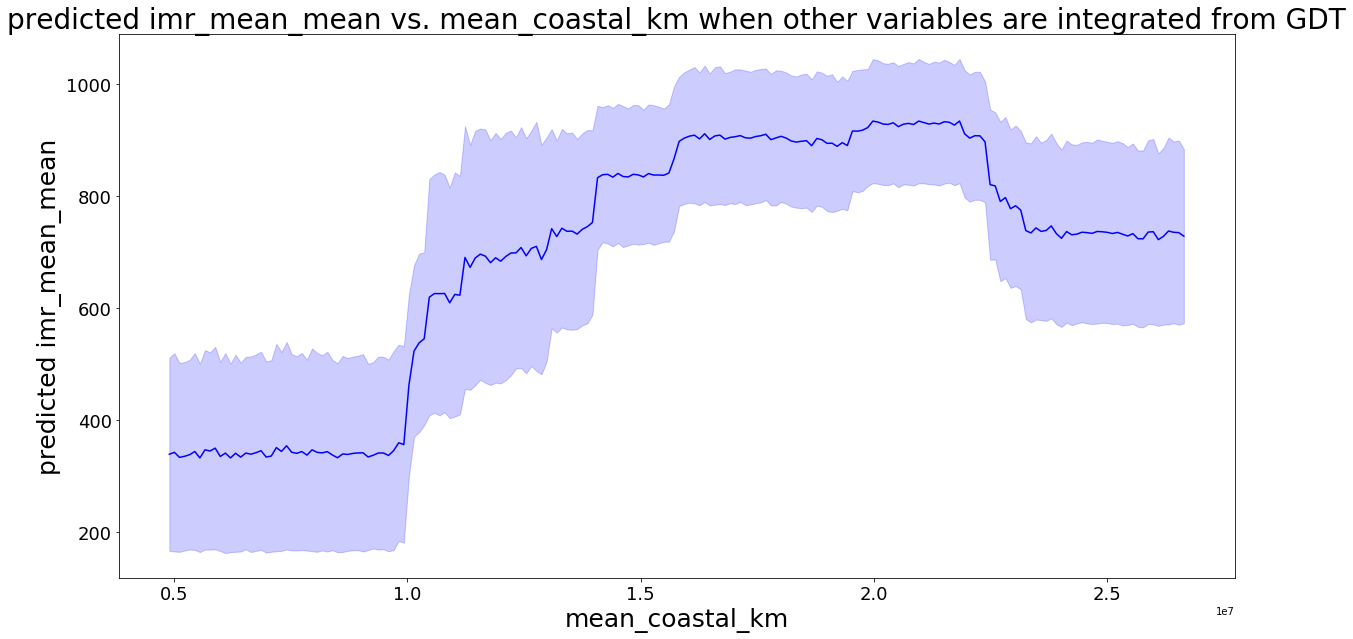

In [59]:
fig3 = plt.figure(figsize=(20,10))
ax3 = fig3.add_subplot(111) 
ax3.set_title('predicted imr_mean_mean vs. mean_coastal_km when other variables are integrated from GDT',size=28)
ax3.tick_params(labelsize=18)
ax3.set_xlabel('mean_coastal_km',fontsize=25)
ax3.set_ylabel('predicted imr_mean_mean',fontsize=25)
ax3.plot([i for i in np.arange(min_coastal,max_coastal,grid)], y_experiment_integral, color='blue')
ax3.fill_between([i for i in np.arange(min_coastal,max_coastal,grid)], [(y-std) for y, std in zip(y_experiment_integral,y_experiment_std)],\
                  [(y+std) for y, std in zip(y_experiment_integral,y_experiment_std)],
                 color='blue', alpha=0.2,interpolate=True)
fig3.show()

In [62]:
fig3.savefig('imr-costal_integral.pdf', format='pdf', dpi=1000)